In [1]:
import asyncio
import time
import pandas as pd
from playwright.async_api import async_playwright
playwright = await async_playwright().start()
browser = await playwright.chromium.launch(headless = False)
page = await browser.new_page()

In [2]:
url = "https://www.google.com/search?q=site:indiatoday.in/fact-check&client=firefox-b-1-d&tbs=cdr:1,cd_min:12/1/2019,cd_max:3/31/2020&ei=CsOPY5-JM-_i5NoPr-GlmAw&start=0&sa=N&ved=2ahUKEwiftvCOhub7AhVvMVkFHa9wCcM4HhDy0wN6BAgFEAQ&biw=1440&bih=815&dpr=2"
await page.goto(url)

<Response url='https://www.google.com/search?q=site:indiatoday.in/fact-check&client=firefox-b-1-d&tbs=cdr:1,cd_min:12/1/2019,cd_max:3/31/2020&ei=CsOPY5-JM-_i5NoPr-GlmAw&start=0&sa=N&ved=2ahUKEwiftvCOhub7AhVvMVkFHa9wCcM4HhDy0wN6BAgFEAQ&biw=1440&bih=815&dpr=2' request=<Request url='https://www.google.com/search?q=site:indiatoday.in/fact-check&client=firefox-b-1-d&tbs=cdr:1,cd_min:12/1/2019,cd_max:3/31/2020&ei=CsOPY5-JM-_i5NoPr-GlmAw&start=0&sa=N&ved=2ahUKEwiftvCOhub7AhVvMVkFHa9wCcM4HhDy0wN6BAgFEAQ&biw=1440&bih=815&dpr=2' method='GET'>>

'<!DOCTYPE html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta charset="UTF-8"><meta content="origin" name="referrer"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>site:indiatoday.in/fact-check - Google Search</title><script src="https://apis.google.com/_/scs/abc-static/_/js/k=gapi.gapi.en.PlpnwD4HYro.O/m=gapi_iframes,googleapis_client/rt=j/sv=1/d=1/ed=1/rs=AHpOoo-D4573md5GmdJHX15d0lc3SoObhA/cb=gapi.loaded_0" nonce="" async=""></script><script nonce="">(function(){var b=window.addEventListener;window.addEventListener=function(a,c,d){"unload"!==a&&b(a,c,d)};}).call(this);(function(){window.google={kEI:\'r8SPY5KNKs3k5NoPh7SmyA4\',kEXPI:\'31\',kBL:\'p9Xv\'};google.sn=\'web\';google.kHL=\'en\';})();(function(){\nvar f=this||self;var h,k=[];function l(a){for(var b;a&&(!a.getAttribute||!(b=a.getAttribute("eid")));)a=a.parentNode;return b||h}function m(a){for(var b=null;a&&(!a.getAttribute||!(b=a.g
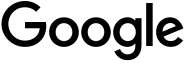

In [3]:
await page.content()

In [4]:
results = page.locator('.yuRUbf a')
results

<Locator frame=<Frame name= url='https://www.google.com/search?q=site:indiatoday.in/fact-check&client=firefox-b-1-d&tbs=cdr:1,cd_min:12/1/2019,cd_max:3/31/2020&ei=CsOPY5-JM-_i5NoPr-GlmAw&start=0&sa=N&ved=2ahUKEwiftvCOhub7AhVvMVkFHa9wCcM4HhDy0wN6BAgFEAQ&biw=1440&bih=815&dpr=2'> selector='.yuRUbf a'>

In [5]:
count = await results.count()
count

10

In [6]:
for i in range(count):
    links = results.nth(i)
    print(await links.get_attribute('href'))

https://www.indiatoday.in/fact-check/story/shahrukh-delhi-violence-1650347-2020-02-26
https://www.indiatoday.in/fact-check/story/tasbih-muslims-maharashtra-1624274-2019-12-02
https://www.indiatoday.in/fact-check/story/fact-check-coronavirus-hold-breath-1658725-2020-03-23
https://www.indiatoday.in/fact-check/story/fake-news-dcp-amit-sharma-1649984-2020-02-25
https://www.indiatoday.in/fact-check/story/fact-check-viral-sanitiser-burn-1659085-2020-03-24
https://www.indiatoday.in/fact-check/story/billboard-australia-islam-claim-fact-check-1655189-2020-03-13
https://www.indiatoday.in/fact-check/story/fact-check-detention-centre-baby-mother-1631989-2019-12-27
https://www.indiatoday.in/fact-check/story/nepali-tiktok-starts-fact-check-finnish-minister-1632424-2019-12-29
https://www.indiatoday.in/fact-check/story/fact-check-naseemuddin-siddiqui-amit-malviya-sambit-patra-1633410-2020-01-02
https://www.indiatoday.in/fact-check/story/china-permission-court-kill-thousands-coronavirus-petients-viral-

In [8]:
india_today = []

while True:
    try:
        # Do the scraping
        results = page.locator('.yuRUbf a')
        time.sleep(1)
        count = await results.count()
        
        for i in range(count):
            links = results.nth(i)
            url = await links.get_attribute('href')
            if "webcache.google" not in url:
#                 print(url)
                india_today.append(url)

    # Click the 'Next' button
        async with page.expect_navigation():
            await page.locator("#pnnext").click(timeout=5000)
        print("Pressing the button")
        print("---------")
    except: #Exception as e
#         raise(e)
#         # Exit the loop
        break

Pressing the button
---------
Pressing the button
---------
Pressing the button
---------
Pressing the button
---------
Pressing the button
---------
Pressing the button
---------
Pressing the button
---------
Pressing the button
---------
Pressing the button
---------
Pressing the button
---------
Pressing the button
---------
Pressing the button
---------


In [9]:
india_today

['https://www.indiatoday.in/fact-check/story/shahrukh-delhi-violence-1650347-2020-02-26',
 'https://www.indiatoday.in/fact-check/story/tasbih-muslims-maharashtra-1624274-2019-12-02',
 'https://www.indiatoday.in/fact-check/story/fact-check-coronavirus-hold-breath-1658725-2020-03-23',
 'https://www.indiatoday.in/fact-check/story/fake-news-dcp-amit-sharma-1649984-2020-02-25',
 'https://www.indiatoday.in/fact-check/story/fact-check-viral-sanitiser-burn-1659085-2020-03-24',
 'https://www.indiatoday.in/fact-check/story/billboard-australia-islam-claim-fact-check-1655189-2020-03-13',
 'https://www.indiatoday.in/fact-check/story/fact-check-detention-centre-baby-mother-1631989-2019-12-27',
 'https://www.indiatoday.in/fact-check/story/nepali-tiktok-starts-fact-check-finnish-minister-1632424-2019-12-29',
 'https://www.indiatoday.in/fact-check/story/fact-check-naseemuddin-siddiqui-amit-malviya-sambit-patra-1633410-2020-01-02',
 'https://www.indiatoday.in/fact-check/story/china-permission-court-kill

In [10]:
len(india_today)

126

In [12]:
df = pd.DataFrame({'url': india_today})
df.head()

,url
0,https://www.indiatoday.in/fact-check/story/sha...
1,https://www.indiatoday.in/fact-check/story/tas...
2,https://www.indiatoday.in/fact-check/story/fac...
3,https://www.indiatoday.in/fact-check/story/fak...
4,https://www.indiatoday.in/fact-check/story/fac...


In [13]:
df.to_csv("india_today.csv", index=False)